In [2]:
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## SVM 模块
数据集采用MNIST
采用RBF核，训练集10000例，测试集2000例

In [3]:
mnist = fetch_openml('mnist_784',version=1)
X = mnist.data / 255.0
y = mnist.target.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000,test_size=2000,random_state=42)

svm_clf = svm.SVC(kernel = 'rbf',gamma='scale')

svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9565


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
batch_size = 128
epochs = 3
learning_rate = 0.001

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
    ])
train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),nn.ReLU(),nn.MaxPool2d(2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),nn.ReLU(),nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128),nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    for data,target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

def test(model, test_loader):
    model.eval()
    correct, total = 0,0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return correct/total

for epoch in range(epochs):
    train(model, train_loader, criterion, optimizer, epoch+1)
cnn_accuracy = test(model, test_loader)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

CNN Accuracy: 0.9893


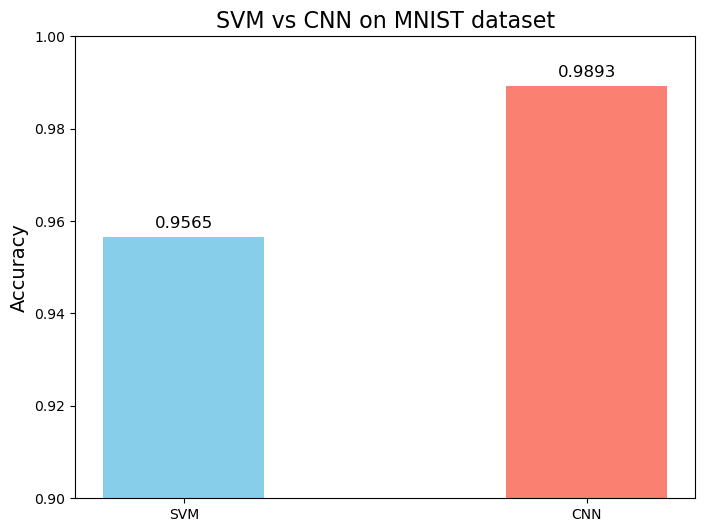

In [6]:
methods = ['SVM', 'CNN']
accuracy = [svm_accuracy, cnn_accuracy]

plt.figure(figsize=(8,6))
plt.bar(methods, accuracy, color=['skyblue', 'salmon'],width=0.4)
plt.ylim(0.9,1)
plt.ylabel('Accuracy',fontsize=14)
plt.title('SVM vs CNN on MNIST dataset',fontsize=16)
for idx,acc in enumerate(accuracy):
    plt.text(idx, acc+0.002, f"{acc:.4f}", ha='center', fontsize=12)
plt.show()